# ** Importing Libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# **1. Data Preprocessing:**

In [ ]:
df = pd.read_csv('onlinefoods.csv')
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


# 2. Handle missing **values**

In [ ]:

missing_values = df.isnull().sum()
print(missing_values)

for column in df.columns:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        df[column].fillna(df[column].mean(), inplace=True)

# Impute missing values with the mode for categorical columns
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)

missing_values = df.isnull().sum()
print(missing_values)


Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64
Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64


# **3. Encode Categorical Variables**

In [ ]:
df_dummies = pd.get_dummies(df, drop_first=True)


# 4. **Feature selection**

In [ ]:
df['Feedback'] = df['Feedback'].map({'Positive': 1, 'Negative': 0})
df['Gender'] = df['Gender'].map({'Positive': 1, 'Negative': 0})
df['Marital Status'] = df['Marital Status'].map({'Positive': 1, 'Negative': 0})
df['Occupation'] = df['Occupation'].map({'Positive': 1, 'Negative': 0})
df['Output'] = df['Output'].map({'Positive': 1, 'Negative': 0})





df_dummies = df.drop('Monthly Income', axis=1)
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies['feed'] = (df['Feedback'] > 0).astype(int)

X = df_dummies.drop([ 'Feedback','Gender', 'Marital Status', 'Occupation', 'Output',
                     'latitude', 'longitude', 'feed', 'Pin code'  ], axis=1)
Y = df_dummies['feed']
print(df)

     Age  Gender  Marital Status  Occupation  Monthly Income  \
0     20     NaN             NaN         NaN       No Income   
1     24     NaN             NaN         NaN  Below Rs.10000   
2     22     NaN             NaN         NaN  Below Rs.10000   
3     22     NaN             NaN         NaN       No Income   
4     22     NaN             NaN         NaN  Below Rs.10000   
..   ...     ...             ...         ...             ...   
383   23     NaN             NaN         NaN       No Income   
384   23     NaN             NaN         NaN       No Income   
385   22     NaN             NaN         NaN       No Income   
386   23     NaN             NaN         NaN  Below Rs.10000   
387   23     NaN             NaN         NaN       No Income   

    Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                Post Graduate            4   12.9766    77.5993    560001   
1                     Graduate            3   12.9770    77.5773    560009 

# **5. Descriptive Statistics**

In [ ]:
numeric_summary = df.describe()

print(numeric_summary)

              Age  Gender  Marital Status  Occupation  Family size  \
count  388.000000     0.0             0.0         0.0   388.000000   
mean    24.628866     NaN             NaN         NaN     3.280928   
std      2.975593     NaN             NaN         NaN     1.351025   
min     18.000000     NaN             NaN         NaN     1.000000   
25%     23.000000     NaN             NaN         NaN     2.000000   
50%     24.000000     NaN             NaN         NaN     3.000000   
75%     26.000000     NaN             NaN         NaN     4.000000   
max     33.000000     NaN             NaN         NaN     6.000000   

         latitude   longitude       Pin code  Output  Feedback  
count  388.000000  388.000000     388.000000     0.0     317.0  
mean    12.972058   77.600160  560040.113402     NaN       1.0  
std      0.044489    0.051354      31.399609     NaN       0.0  
min     12.865200   77.484200  560001.000000     NaN       1.0  
25%     12.936900   77.565275  560010.750000

*Age Distribution:

The average age in the dataset is approximately 24.63 years, with a standard deviation of about 2.98. This indicates that the ages are relatively close to the mean, with limited variability.
The youngest person in the dataset is 18 years old, while the oldest is 33 years old. This suggests that the dataset covers a relatively young population, with a narrow age range.*

# **6. Visualizations**

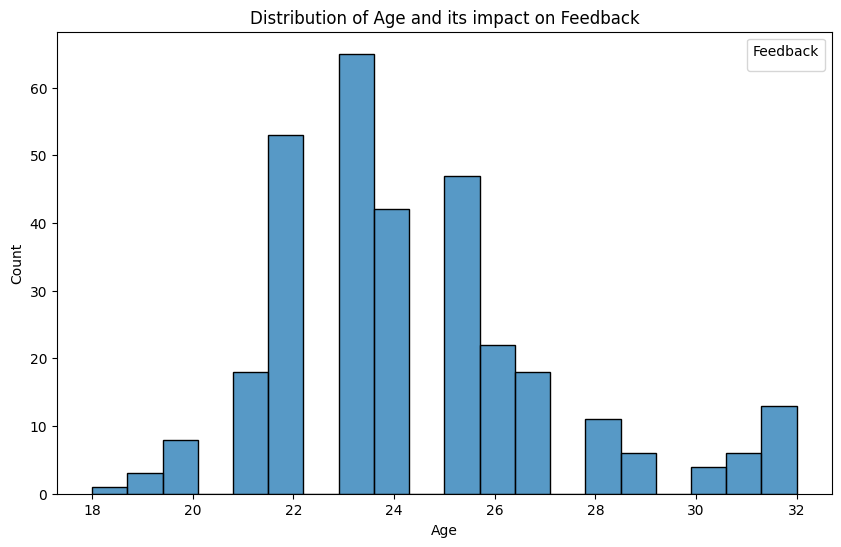

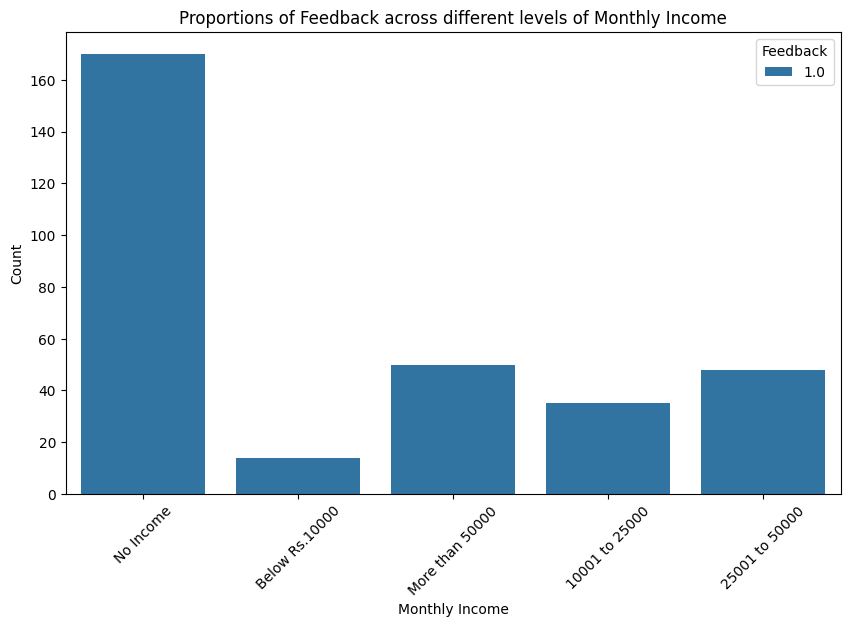

<ipython-input-20-ca2e633d47bf>:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


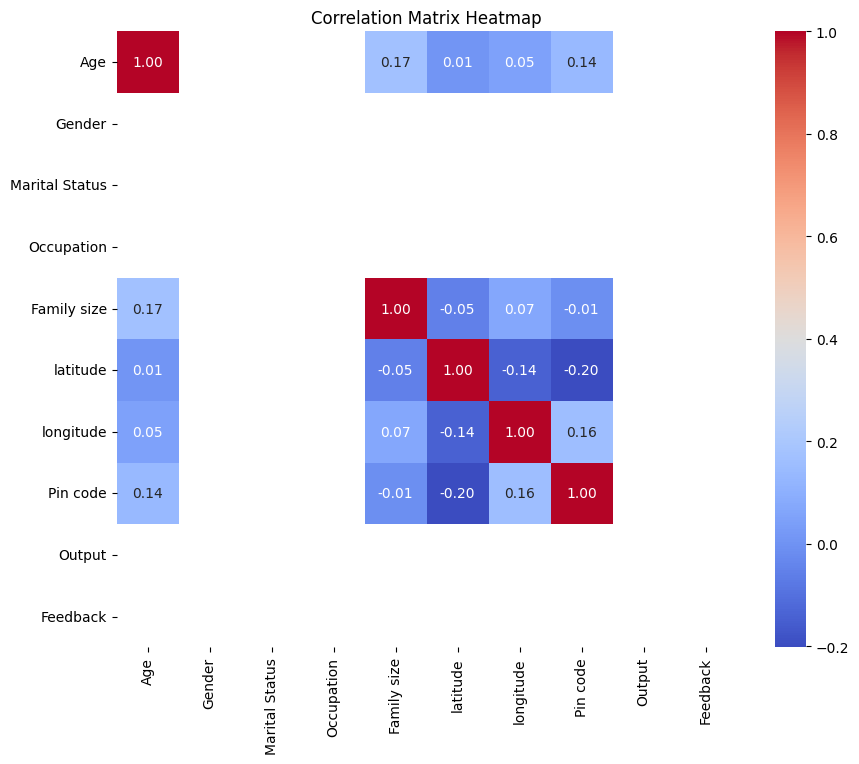

In [ ]:


plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Feedback', multiple='stack', bins=20)
plt.title('Distribution of Age and its impact on Feedback')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Feedback')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Monthly Income', hue='Feedback')
plt.title('Proportions of Feedback across different levels of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.legend(title='Feedback')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


# **7. build the model**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state=42 )

# **Model training**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, Y_train)

LogisticRegression()

# **8. Model ecaluation**

In [ ]:
Y_pred = model.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix: ")
print(conf_matrix)
print("Classification Report: ")
print(class_report)

Accuracy: 0.8589743589743589
Confusion Matrix: 
[[ 5  6]
 [ 5 62]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.45      0.48        11
           1       0.91      0.93      0.92        67

    accuracy                           0.86        78
   macro avg       0.71      0.69      0.70        78
weighted avg       0.85      0.86      0.86        78



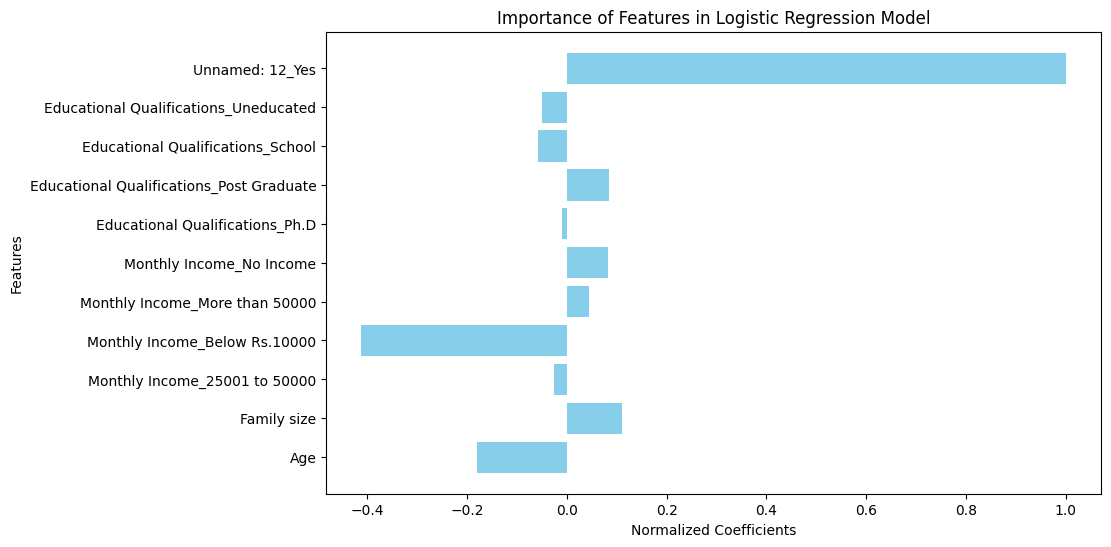

Age: -0.2698109376174281
Family size: 0.1635148121115315
Monthly Income_25001 to 50000: -0.038995826279349284
Monthly Income_Below Rs.10000: -0.6144682432075265
Monthly Income_More than 50000: 0.06712499561460465
Monthly Income_No Income: 0.12137027802909649
Educational Qualifications_Ph.D: -0.016043664374833233
Educational Qualifications_Post Graduate: 0.12543416957168468
Educational Qualifications_School: -0.08693115768451432
Educational Qualifications_Uneducated: -0.0746816239436414
Unnamed: 12_Yes: 1.4902153018517985


In [ ]:
coefficients = model.coef_[0]
feature_names = X.columns

# Normalize coefficients
normalized_coefficients = coefficients / np.abs(coefficients).max()

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, normalized_coefficients, color='skyblue')
plt.xlabel('Normalized Coefficients')
plt.ylabel('Features')
plt.title('Importance of Features in Logistic Regression Model')
plt.show()

# Discuss the impact of each feature on the prediction of feedback
for feature, coefficient in zip(feature_names, coefficients):
    print(f"{feature}: {coefficient}")

# **9. prediction insights**

Age: The negative coefficient suggests that older individuals tend to give less positive feedback compared to younger individuals. This could imply that age may influence satisfaction levels or the likelihood of providing positive reviews.

Family Size: A positive coefficient indicates that larger family sizes are associated with a higher likelihood of positive feedback. This might suggest that individuals from larger families are more satisfied or inclined to provide positive feedback.

Monthly Income: Individuals with higher monthly incomes are more likely to give positive feedback, as indicated by the positive coefficient for higher income categories and the negative coefficient for the lowest income category. This aligns with the expectation that individuals with higher purchasing power may have higher satisfaction levels.

Educational Qualifications: Postgraduate qualifications have a positive coefficient, indicating that individuals with higher education levels are more likely to provide positive feedback. This suggests a potential correlation between education level and the propensity to give positive reviews.

Output: The large positive coefficient for an unspecified variable suggests that when this variable is present (i.e., equals Yes), it significantly increases the probability of positive feedback according to the model.